In [5]:
"""
Assumes CSV files are in the same directory
"""
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

from collections import Counter

# Env vars
DATA_PATH_FACEBOOK = "../../big_companies/collect_data/facebook.csv"
DATA_PATH_AMAZON = "../../big_companies/collect_data/amazon.csv"
DATA_PATH_APPLE = "../../big_companies/collect_data/apple.csv"
DATA_PATH_MICROSOFT = "../../big_companies/collect_data/microsoft.csv"

SEP = ','
COL_NAMES = ["RepoID",
             "Name",
             "Type",
             "Topics",
             "Visibility",
             "Language",
             "LanguageURL",
             "Published",
             "Last_Modified",
             "Stars",
             "Forks",
             "WatchCount",
             "NetworkCount",
             "IssueCount",
             "PRCount",
             "ProjectsCount",
             "BranchCount",
             "DownloadCount",
             "ContributorCount",
             "RepoURL"]
# Pull CSV to DF
data_facebook = pd.read_csv(DATA_PATH_FACEBOOK, sep=SEP, names=COL_NAMES)
data_amazon = pd.read_csv(DATA_PATH_AMAZON, sep=SEP, names=COL_NAMES)
data_apple = pd.read_csv(DATA_PATH_APPLE, sep=SEP, names=COL_NAMES)
data_microsoft = pd.read_csv(DATA_PATH_MICROSOFT, sep=SEP, names=COL_NAMES)
# SANITIZING $

# Remove duplicates
data_facebook.drop_duplicates(inplace=True)

# convert 'Published' column to datetime format
data_facebook['Published'] = pd.to_datetime(data_facebook['Published'])

# extract year from the 'Published' column
data_facebook['Published'] = data_facebook['Published'].dt.year

# Fill NaN's
data_facebook['Published'].fillna(0).astype(int)
data_facebook['ProjectsCount'].fillna(0).astype(int)

# Drop rows with no language val since that is what we care about
data_facebook.dropna(subset=['Language'], inplace=True)
# Remove duplicates
data_amazon.drop_duplicates(inplace=True)

# convert 'Published' column to datetime format
data_amazon['Published'] = pd.to_datetime(data_amazon['Published'])

# extract year from the 'Published' column
data_amazon['Published'] = data_amazon['Published'].dt.year

# Fill NaN's
data_amazon['Published'].fillna(0).astype(int)
data_amazon['ProjectsCount'].fillna(0).astype(int)

# Drop rows with no language val since that is what we care about
data_amazon.dropna(subset=['Language'], inplace=True)
# Remove duplicates
data_apple.drop_duplicates(inplace=True)

# convert 'Published' column to datetime data_apple
data_apple['Published'] = pd.to_datetime(data_apple['Published'])

# extract year from the 'Published' column
data_apple['Published'] = data_apple['Published'].dt.year

# Fill NaN's
data_apple['Published'].fillna(0).astype(int)
data_apple['ProjectsCount'].fillna(0).astype(int)

# Drop rows with no language val since that is what we care about
data_apple.dropna(subset=['Language'], inplace=True)
# Remove duplicates
data_microsoft.drop_duplicates(inplace=True)

# convert 'Published' column to datetime format
data_microsoft['Published'] = pd.to_datetime(data_microsoft['Published'])

# extract year from the 'Published' column
data_microsoft['Published'] = data_microsoft['Published'].dt.year

# Fill NaN's
data_microsoft['Published'].fillna(0).astype(int)
data_microsoft['ProjectsCount'].fillna(0).astype(int)

# Drop rows with no language val since that is what we care about
data_microsoft.dropna(subset=['Language'], inplace=True)
data_all = pd.concat([data_facebook, data_amazon, data_apple, data_microsoft])

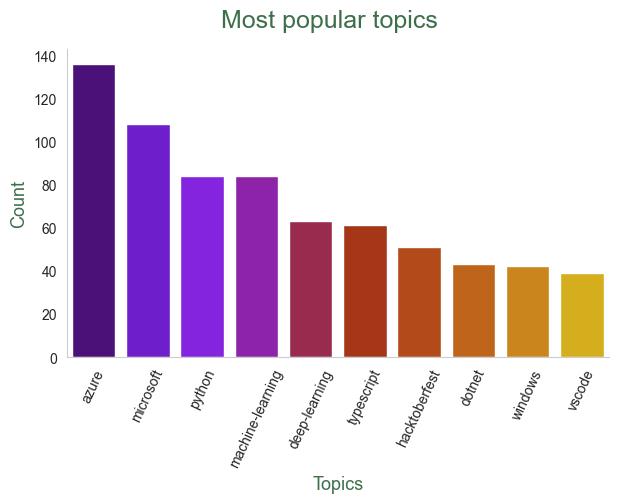

In [6]:
# convert column to list(list())
# use ast to parse the string literal topics into a list
topics = data_all['Topics'].apply(lambda x: ast.literal_eval(x)).tolist()

# split all lists and select individual items
tags = [tag for topic in topics for tag in topic]

# Tally how much each tag appears
tags_count = Counter(tags)

# create a dataframe with most common tags
top_tags_df = pd.DataFrame(tags_count.most_common(10), columns=['TagName','Count'])

# set figure size
fig, ax = plt.subplots(figsize=(7, 4))

# Turn labels on x-axis
plt.xticks(rotation=65)

# Get rid of grid and turn bg white
ax.grid(False)
ax.set_facecolor('white')
sns.despine()

# plot
sns.barplot(data=top_tags_df, x='TagName', y='Count', palette='gnuplot');


# axis labels and title
ax.set_xlabel('Topics', fontsize=13, color = '#3d704a')
ax.set_ylabel('Count', fontsize=13, color = '#3d704a')
fig.suptitle('Most popular topics',fontsize=18, color = '#3d704a');